In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OrdinalEncoder , StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error , mean_squared_error

In [2]:
!cp /content/drive/MyDrive/AI_VietNam/Module4/163_ES_DecisionTreeAndRandomRorestExercise/Housing.csv /content/

In [3]:
dataset_path = './Housing.csv'
df = pd.read_csv(dataset_path)


In [4]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
df.describe()


,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [6]:
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [7]:
categorical_cols = df.select_dtypes ( include =['object']).columns.to_list()
print( categorical_cols )

['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']


In [8]:
ordinal_encoder = OrdinalEncoder ()
encoded_categorical_cols = ordinal_encoder.fit_transform (
    df[ categorical_cols ]
)
encoded_categorical_df = pd.DataFrame (
    encoded_categorical_cols ,
    columns = categorical_cols
)
numerical_df = df.drop( categorical_cols , axis =1)
encoded_df = pd.concat(
    [ numerical_df , encoded_categorical_df ],
    axis =1
)

In [9]:
print(encoded_categorical_cols)
print(encoded_categorical_df)
print(df.head())


[[1. 0. 0. ... 1. 1. 0.]
 [1. 0. 0. ... 1. 0. 0.]
 [1. 0. 1. ... 0. 1. 1.]
 ...
 [1. 0. 0. ... 0. 0. 2.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 2.]]
     mainroad  guestroom  basement  hotwaterheating  airconditioning  \
0         1.0        0.0       0.0              0.0              1.0   
1         1.0        0.0       0.0              0.0              1.0   
2         1.0        0.0       1.0              0.0              0.0   
3         1.0        0.0       1.0              0.0              1.0   
4         1.0        1.0       1.0              0.0              1.0   
..        ...        ...       ...              ...              ...   
540       1.0        0.0       1.0              0.0              0.0   
541       0.0        0.0       0.0              0.0              0.0   
542       1.0        0.0       0.0              0.0              0.0   
543       0.0        0.0       0.0              0.0              0.0   
544       1.0        0.0       0.0              0.0 

In [10]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [11]:
normalizer = StandardScaler ()
dataset_arr = normalizer.fit_transform( encoded_df )

In [12]:
X, y = dataset_arr[:, 1:] , dataset_arr[:, 0]

In [13]:
test_size = 0.3
random_state = 1
is_shuffle = True
X_train , X_val , y_train , y_val = train_test_split (
  X, y,
  test_size = test_size ,
  random_state = random_state ,
  shuffle = is_shuffle
)

In [14]:
print(X_train.shape)
print(y_train.shape)

(381, 12)
(381,)


In [22]:
regressor = DecisionTreeRegressor (
  random_state = random_state,
  # max_depth=3
)
regressor.fit( X_train , y_train )

DecisionTreeRegressor(random_state=1)

In [23]:
y_pred = regressor.predict ( X_val )

In [24]:
mae = mean_absolute_error (y_val , y_pred )
mse = mean_squared_error (y_val , y_pred )

print('Evaluation results on validation set :')
print(f'Mean Absolute Error : {mae}')
print(f'Mean Squared Error : {mse}')

Evaluation results on validation set :
Mean Absolute Error : 0.594233095728814
Mean Squared Error : 0.7245255619360014


[Text(0.5, 0.875, 'x[0] <= 0.371\nsquared_error = 0.929\nsamples = 381\nvalue = 0.005'),
 Text(0.25, 0.625, 'x[2] <= 0.426\nsquared_error = 0.46\nsamples = 249\nvalue = -0.382'),
 Text(0.125, 0.375, 'x[11] <= 0.566\nsquared_error = 0.33\nsamples = 201\nvalue = -0.531'),
 Text(0.0625, 0.125, 'squared_error = 0.303\nsamples = 120\nvalue = -0.362'),
 Text(0.1875, 0.125, 'squared_error = 0.266\nsamples = 81\nvalue = -0.78'),
 Text(0.375, 0.375, 'x[0] <= -0.77\nsquared_error = 0.527\nsamples = 48\nvalue = 0.238'),
 Text(0.3125, 0.125, 'squared_error = 0.129\nsamples = 15\nvalue = -0.219'),
 Text(0.4375, 0.125, 'squared_error = 0.569\nsamples = 33\nvalue = 0.446'),
 Text(0.75, 0.625, 'x[2] <= 0.426\nsquared_error = 0.998\nsamples = 132\nvalue = 0.734'),
 Text(0.625, 0.375, 'x[4] <= -0.225\nsquared_error = 0.681\nsamples = 76\nvalue = 0.304'),
 Text(0.5625, 0.125, 'squared_error = 0.319\nsamples = 28\nvalue = -0.145'),
 Text(0.6875, 0.125, 'squared_error = 0.706\nsamples = 48\nvalue = 0.565')

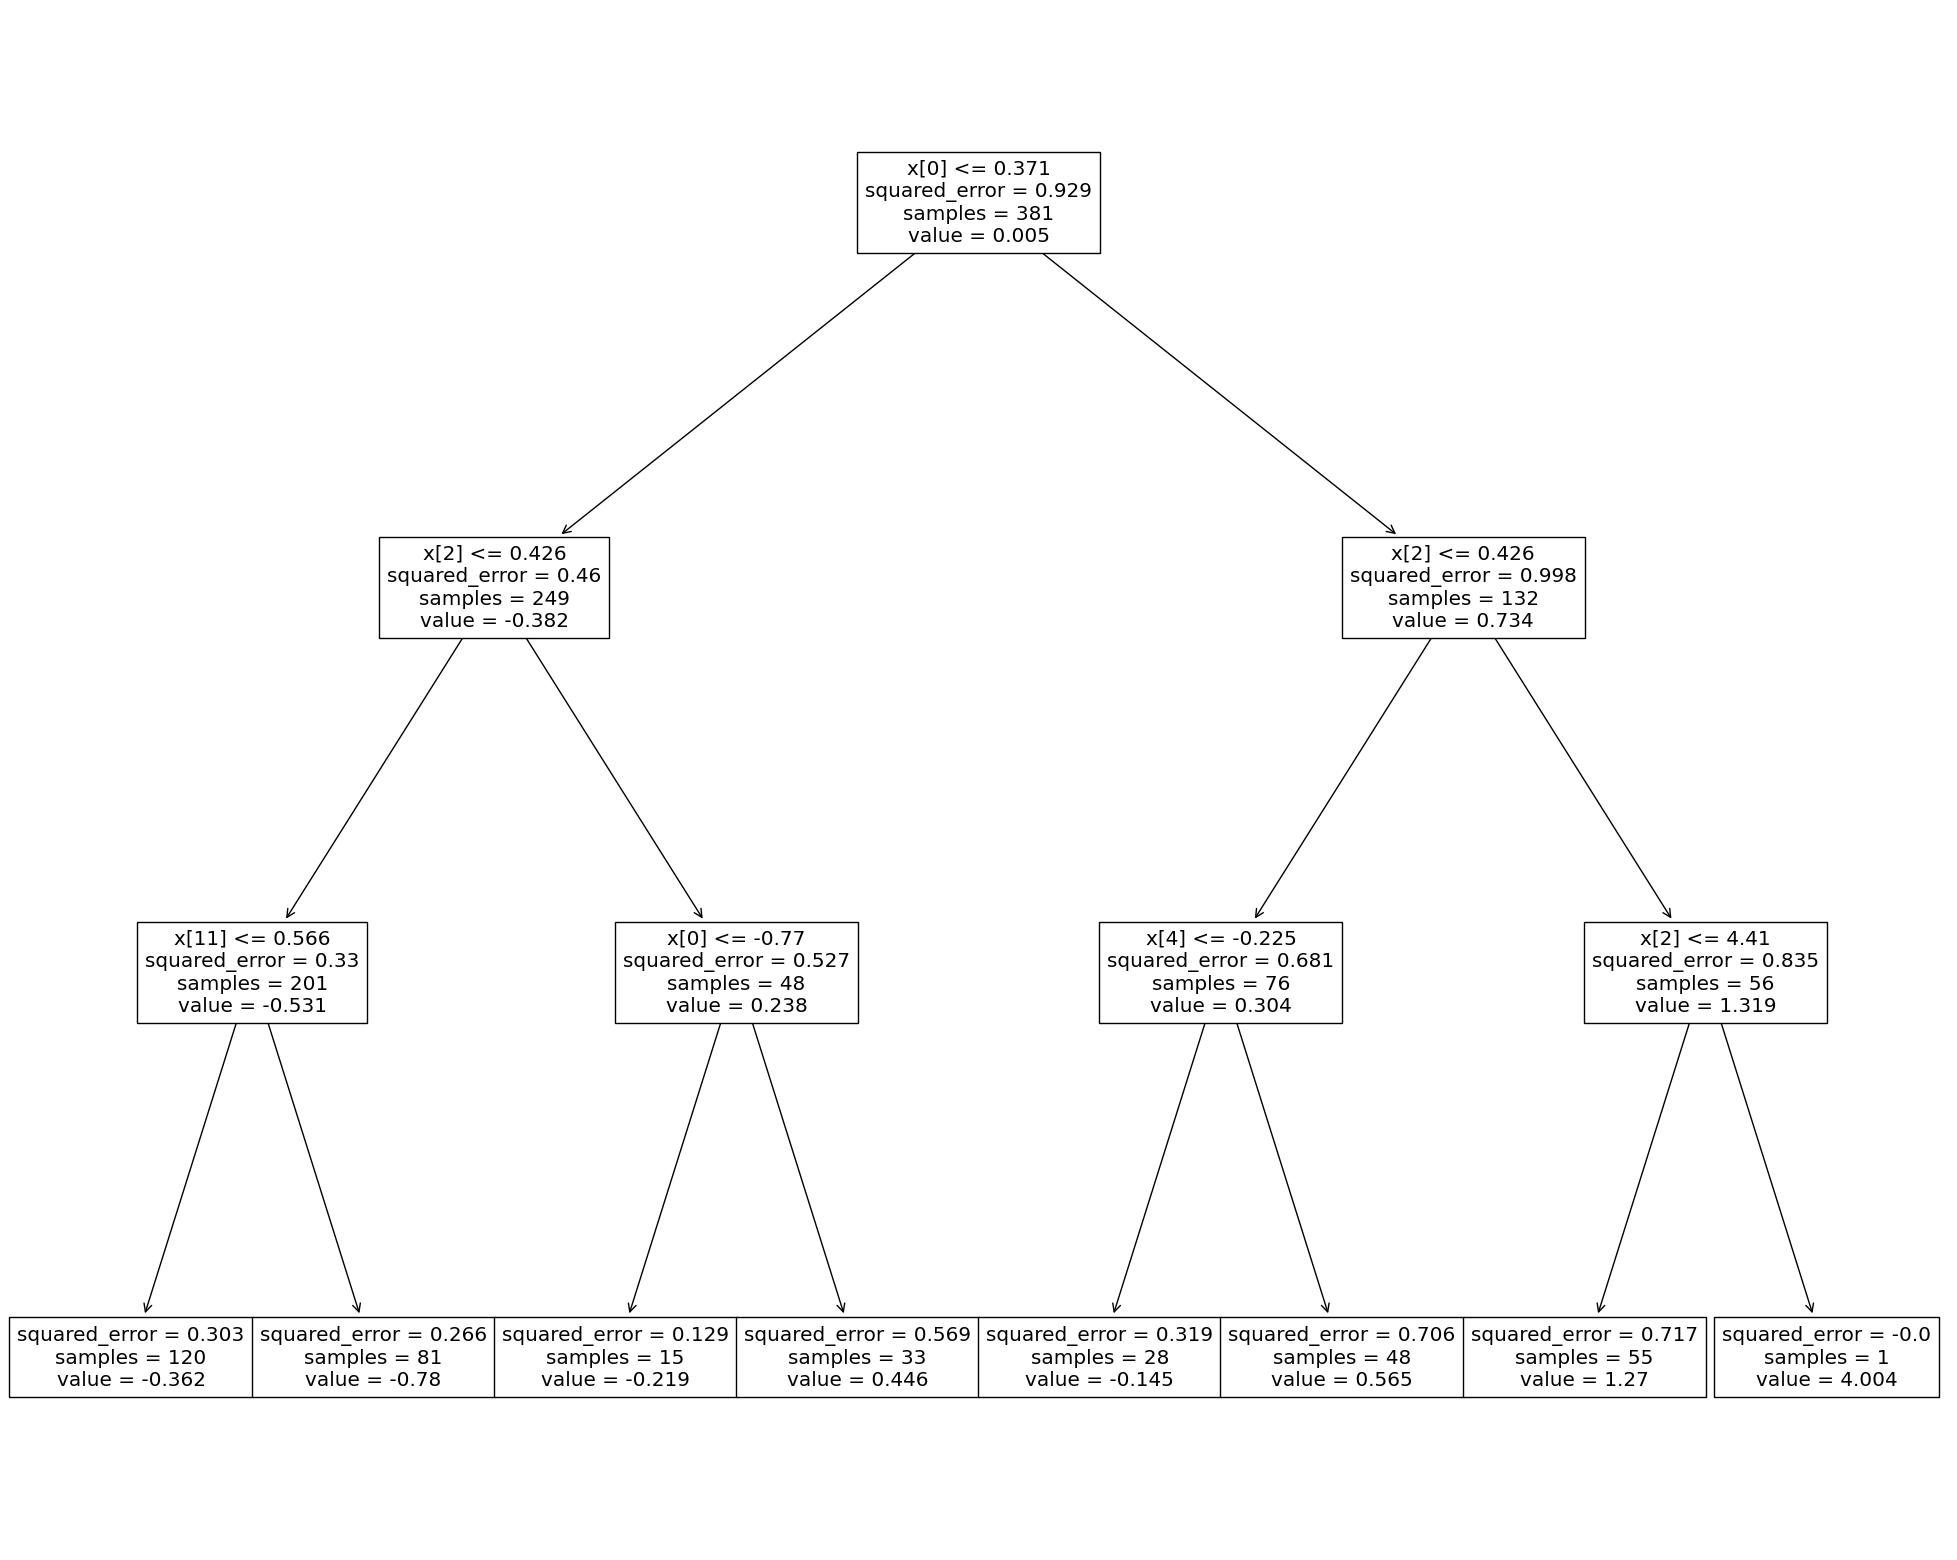

In [18]:
from sklearn import tree
from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize=(25,20))
tree.plot_tree(regressor)

In [25]:
regressor = RandomForestRegressor (
  random_state = random_state
)
regressor.fit( X_train , y_train )

RandomForestRegressor(random_state=1)

In [26]:
y_pred = regressor.predict ( X_val )

In [27]:
mae = mean_absolute_error (y_val , y_pred )
mse = mean_squared_error (y_val , y_pred )

print('Evaluation results on validation set :')
print(f'Mean Absolute Error : {mae}')
print(f'Mean Squared Error : {mse}')

Evaluation results on validation set :
Mean Absolute Error : 0.46093873321571177
Mean Squared Error : 0.37944418523089524


In [ ]:
print(y_pred )

[ 1.39750567  0.53833331  1.66612229  0.81992938 -0.27026975 -0.70175696
 -1.1168747   0.59959109 -1.00751579 -0.19651349 -0.82319819 -0.92233274
 -0.18984584 -0.35829778  1.3908942   1.72325061 -0.31849787 -0.29098443
  0.65827619 -1.10065507 -0.45282491  0.02475528 -0.16437389 -0.72299606
  0.3199676   1.23594613 -1.08615853  1.62697791  0.93241797 -0.42551187
  1.10858642  1.10916104 -0.42579843 -0.31246702  0.38362872 -0.50697152
  0.76670051 -1.07398444  0.15531771  0.48686501  0.04387796 -0.66457916
 -0.71265745 -0.08601021  1.08210309 -0.63071022  0.09356698 -0.95878009
 -1.18716228 -1.24359761 -0.17235261 -0.47629281 -1.09769583 -0.51496709
  0.05856179 -0.22816613 -0.90264817 -0.19535227 -0.29169615  0.13919172
  1.0592158   0.55440986 -1.15504515 -0.13639222 -0.04261426 -1.34033668
  0.12896549 -0.95156929 -0.19909814 -0.25487421  0.23283857  0.54018752
  0.53365097 -0.97887671  0.38080059 -0.68507284 -0.84541122  1.38130477
  0.43032104 -0.74900554  0.01462269  0.0473429   1

In [ ]:
X = np.array([3,5,8,10,12])
X = X.reshape((-1,1))
y = np.array([12,20,28,32,36])
print(X.shape)
print(X)
print(y.shape)

(5, 1)
[[ 3]
 [ 5]
 [ 8]
 [10]
 [12]]
(5,)


In [ ]:
regressor_max_depth_three = DecisionTreeRegressor()
#Fit the regressor object to the dataset.
regressor_max_depth_three.fit(X,y)

DecisionTreeRegressor()

[Text(0.4444444444444444, 0.875, 'x[0] <= 6.5\nsquared_error = 74.24\nsamples = 5\nvalue = 25.6'),
 Text(0.2222222222222222, 0.625, 'x[0] <= 4.0\nsquared_error = 16.0\nsamples = 2\nvalue = 16.0'),
 Text(0.1111111111111111, 0.375, 'squared_error = 0.0\nsamples = 1\nvalue = 12.0'),
 Text(0.3333333333333333, 0.375, 'squared_error = 0.0\nsamples = 1\nvalue = 20.0'),
 Text(0.6666666666666666, 0.625, 'x[0] <= 9.0\nsquared_error = 10.667\nsamples = 3\nvalue = 32.0'),
 Text(0.5555555555555556, 0.375, 'squared_error = 0.0\nsamples = 1\nvalue = 28.0'),
 Text(0.7777777777777778, 0.375, 'x[0] <= 11.0\nsquared_error = 4.0\nsamples = 2\nvalue = 34.0'),
 Text(0.6666666666666666, 0.125, 'squared_error = 0.0\nsamples = 1\nvalue = 32.0'),
 Text(0.8888888888888888, 0.125, 'squared_error = 0.0\nsamples = 1\nvalue = 36.0')]

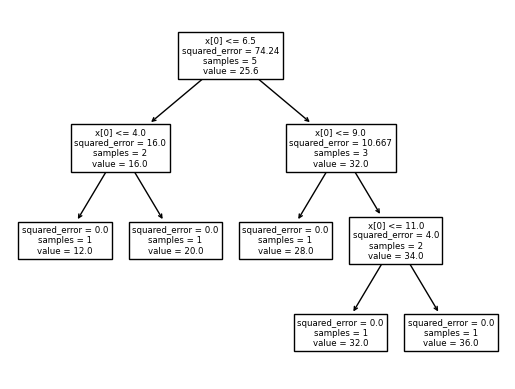

In [ ]:
tree.plot_tree(regressor_max_depth_three)

In [ ]:
a = np.array([2,15])
a = a.reshape((-1,1))
predict=  regressor_max_depth_three.predict(X)

In [ ]:
mae = mean_absolute_error (y , predict )
mse = mean_squared_error (y , predict )

print('Evaluation results on validation set :')
print(f'Mean Absolute Error : {mae}')
print(f'Mean Squared Error : {mse}')

Evaluation results on validation set :
Mean Absolute Error : 0.0
Mean Squared Error : 0.0
